In [259]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt

In [275]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([1, 1])*1/N), ('B', np.array([-1, -1])*1/N), ('C', np.array([1, -1])*1/N), ('D', np.array([-1, 1])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 0.4
t2 = 1
lattice.add_hoppings(
    ([0, 0], 'A', 'D', t),
    ([0, 0], 'A', 'C', t),
    ([0, 0], 'B', 'C', t),
    ([0, 0], 'B', 'D', t),
    ([1, 1], 'A', 'B', t2),
    ([-1, 1], 'D', 'C', t2),

)

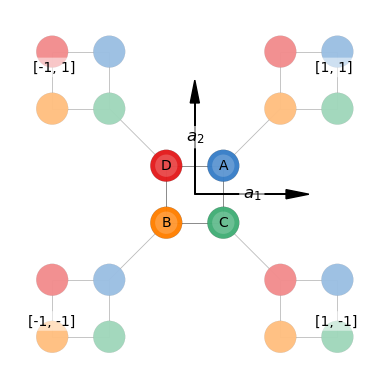

In [276]:
lattice.plot()
plt.gca().axis('off');

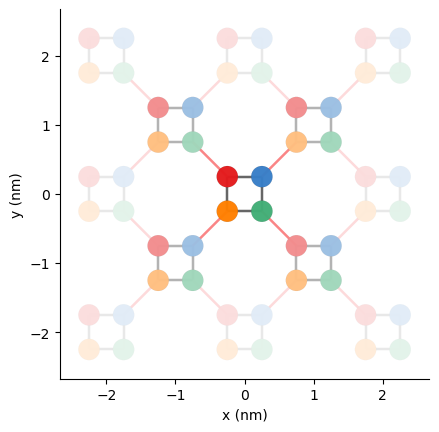

In [277]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)

#model = pb.Model(
#    lattice,
#)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

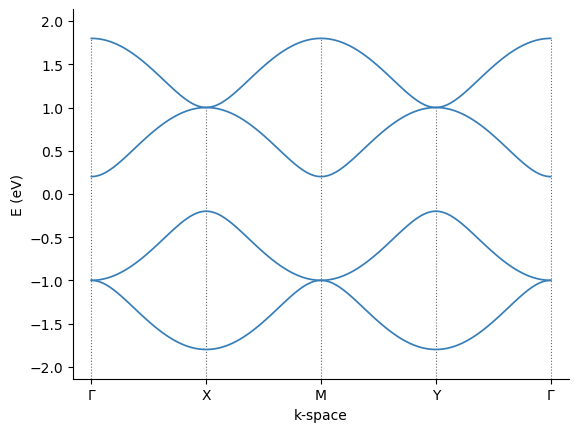

In [278]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

# Symmetry Eigenvalues

In [279]:
solver.set_wave_vector(Gamma)
evectors = solver.eigenvectors

In [280]:
R4 = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0]])
R2 = np.einsum("ij, jk -> ik", R4, R4)

In [281]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R4, evectors), 3)

array([-0.+0.j, -0.+0.j, -1.+0.j,  1.+0.j])

In [282]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([-1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j])

In [283]:
solver.set_wave_vector(X)
evectors = solver.eigenvectors

In [284]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j])

In [285]:
solver.set_wave_vector(M)
evectors = solver.eigenvectors

In [286]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R4, evectors), 3)

array([-0.+0.j, -0.+0.j, -1.-0.j,  1.+0.j])

In [287]:
a1 = np.array([1, 0])
a2 = np.array([0, 1])

lattice = pb.Lattice(a1=a1, a2=a2)

N = 4
M = 20
cladding = 12
for i in range(-M, M):
    for j in range(-M, M):
        if abs(i) > cladding:
            continue
        if abs(j) > cladding: 
            continue
        lattice.add_sublattices(
            (f'A{i} {j}', np.array([1, 1])*1/N +i*a1+j*a2), (f'B{i} {j}', np.array([-1, -1])*1/N +i*a1+j*a2),
            (f'C{i} {j}', np.array([1, -1])*1/N+i*a1+j*a2), (f'D{i} {j}', np.array([-1, 1])*1/N+i*a1+j*a2))

In [288]:
for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'D{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'D{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i+1} {j+1}', t2)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'D{i} {j}', f'C{i-1} {j+1}', t2)
        except: 
            pass 

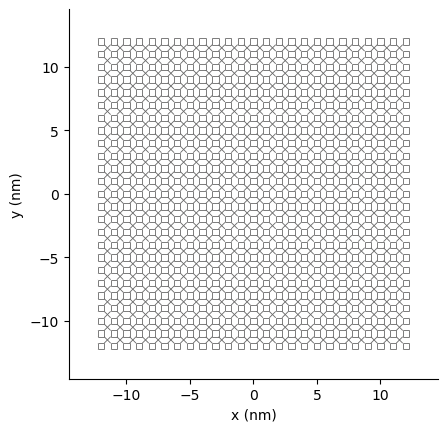

In [289]:
model = pb.Model(
    lattice,
)

model.plot()

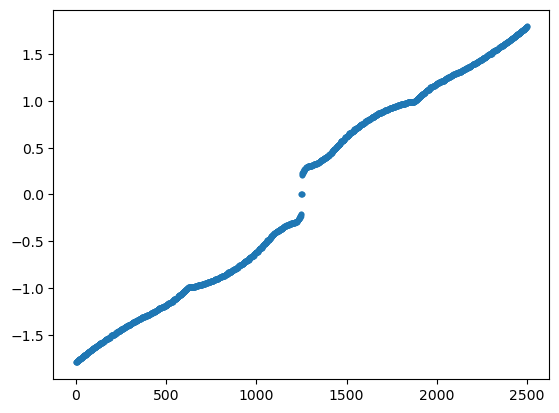

In [291]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues
plt.scatter(range(0, np.size(bands)), bands, s=10)
#plt.ylim(-0.3, 0.3)
#plt.xlim(1247, 1252)

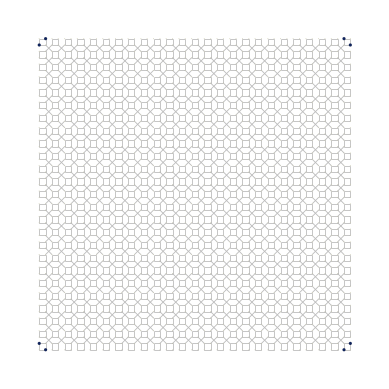

In [292]:
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # eV
ldos.plot(site_radius=(0.03, 0.12))
plt.gca().axis('off');

In [2]:
# Now we try to recreate the figures in Supplementary figures 15 and 16 in Wladimir's paper

In [322]:
# First we model the bulk H_1^4 model

In [385]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([1, 1])*1/N), ('B', np.array([-1, -1])*1/N), ('C', np.array([1, -1])*1/N), ('D', np.array([-1, 1])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 0.5
tx = ty =  1
lattice.add_hoppings(
    ([0, 0], 'A', 'D', t),
    ([0, 0], 'A', 'C', t),
    ([0, 0], 'B', 'C', t),
    ([0, 0], 'B', 'D', t),
    ([1, 0], 'A', 'D', tx),
    ([0, 1], 'A', 'C', ty),
    ([0, -1], 'B', 'D', ty),
    ([-1, 0], 'B', 'C', tx),

)

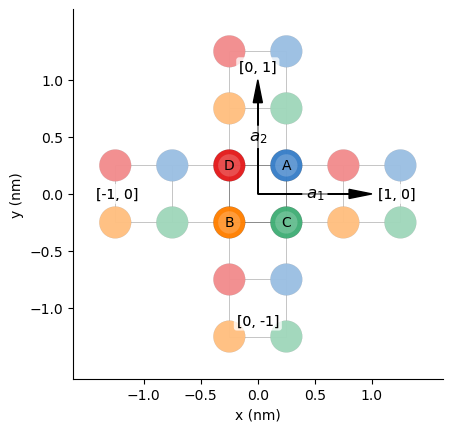

In [386]:
lattice.plot()

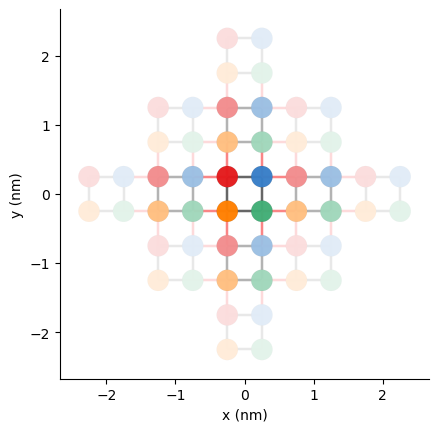

In [387]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

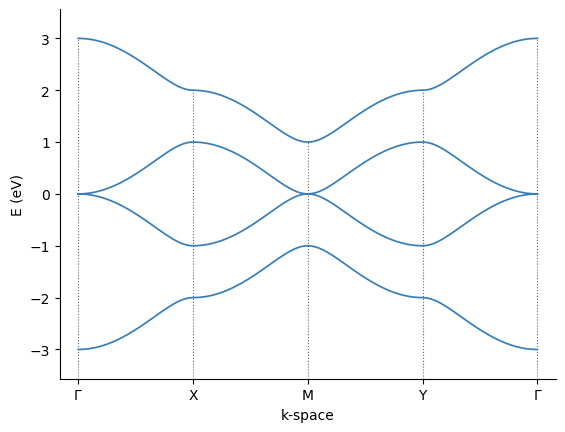

In [388]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

# Symmetry Eigenvalues

In [389]:
R4 = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0]])
R2 = np.einsum("ij, jk -> ik", R4, R4)

In [390]:
solver.set_wave_vector([0, 0])
evectors = solver.eigenvectors

In [391]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R4, evectors), 3)

array([-1.+0.j,  0.+0.j, -0.+0.j,  1.+0.j])

In [392]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([ 1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j])

In [393]:
solver.set_wave_vector(X)
evectors = solver.eigenvectors

In [394]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([-1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j])

In [395]:
solver.set_wave_vector(M)
evectors = solver.eigenvectors

In [396]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R4, evectors), 3)

array([ 1.+0.j,  0.+0.j,  0.+0.j, -1.+0.j])

In [397]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([ 1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j])

# Next we model the bulk H_3^2 model 

In [427]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([0, 1])*1/N), ('B', np.array([-1, 0])*1/N), ('C', np.array([0, -1])*1/N), ('D', np.array([1, 0])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 0.5
tx = ty =  1
lattice.add_hoppings(
    ([0, 0], 'A', 'C', t),
    ([0, 0], 'B', 'D', t),
    ([0, 1], 'A', 'C', ty),
    ([1, 0], 'D', 'B', tx),
)

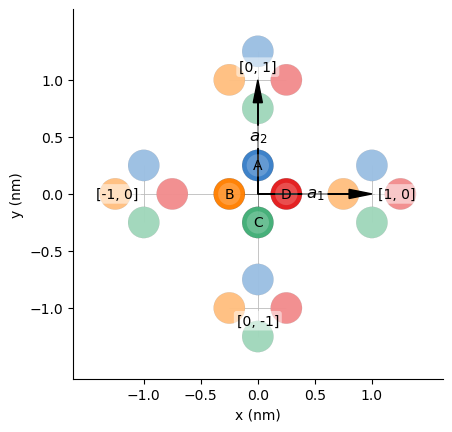

In [428]:
lattice.plot()

In [ ]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

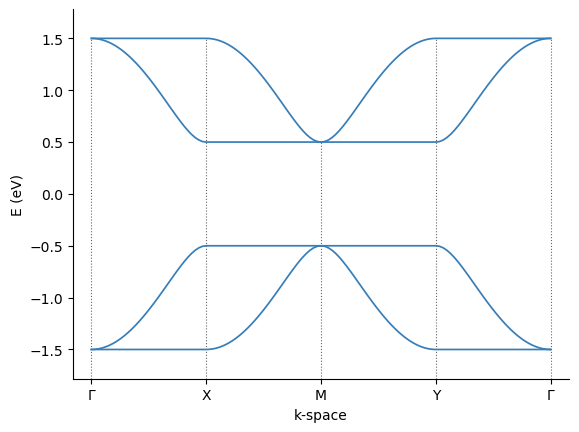

In [456]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

# Symmetry Eigenvalues

In [457]:
R4 = np.array([[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
R2 = np.einsum("ij, jk -> ik", R4, R4)

In [458]:
solver.set_wave_vector(Gamma)
evectors = solver.eigenvectors

In [459]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R4, evectors), 3)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [460]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([-1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j])

In [461]:
solver.set_wave_vector(X)
evectors = solver.eigenvectors

In [462]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([-1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j])

In [463]:
solver.set_wave_vector(M)
evectors = solver.eigenvectors

In [464]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R4, evectors), 3)

array([ 0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j])

In [465]:
np.round(np.einsum('il, ij, jl -> l', np.conj(evectors), R2, evectors), 3)

array([ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j])

In [811]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([0, 1])*1/N), ('B', np.array([-1, 0])*1/N), ('C', np.array([0, -1])*1/N), ('D', np.array([1, 0])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 0.1
tx = ty =  1
lattice.add_hoppings(
    ([0, 0], 'A', 'C', t),
    ([0, 0], 'B', 'D', t),
    ([0, 1], 'A', 'C', ty),
    ([1, 0], 'D', 'B', tx),
)
lattice.add_sublattices(
    ('AA', np.array([1, 1])*1/N), ('BB', np.array([-1, -1])*1/N), ('CC', np.array([1, -1])*1/N), ('DD', np.array([-1, 1])*1/N)  # add an atom called 'A' at position [0, 0]
)
lattice.add_hoppings(
    ([0, 0], 'AA', 'DD', t),
    ([0, 0], 'AA', 'CC', t),
    ([0, 0], 'BB', 'CC', t),
    ([0, 0], 'BB', 'DD', t),
    ([1, 0], 'AA', 'DD', tx),
    ([0, 1], 'AA', 'CC', ty),
    ([0, -1], 'BB', 'DD', ty),
    ([-1, 0], 'BB', 'CC', tx),

)

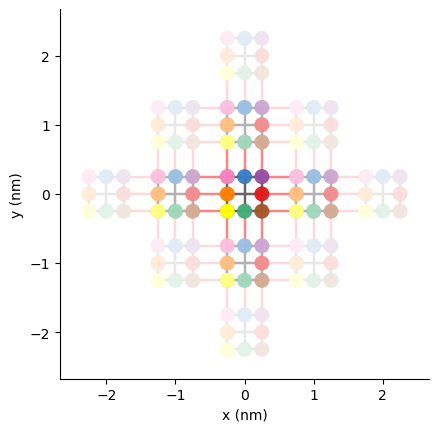

In [812]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

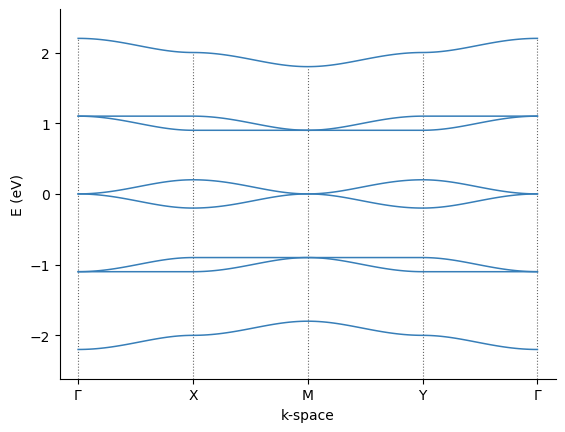

In [813]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

In [1065]:
a1 = np.array([1, 0])
a2 = np.array([0, 1])

lattice = pb.Lattice(a1=a1, a2=a2)

N = 4
M = 30
cladding = 9
for i in range(-M, M):
    for j in range(-M, M):
        if abs(i) > cladding:
            continue
        if abs(j) > cladding: 
            continue
        lattice.add_sublattices(
            (f'A{i} {j}', np.array([0, 1])*1/N +i*a1+j*a2), (f'B{i} {j}', np.array([-1, 0])*1/N +i*a1+j*a2),
            (f'C{i} {j}', np.array([0, -1])*1/N+i*a1+j*a2), (f'D{i} {j}', np.array([1, 0])*1/N+i*a1+j*a2))
        lattice.add_sublattices(
            (f'AA{i} {j}', np.array([1, 1])*1/N+i*a1+j*a2), (f'BB{i} {j}', np.array([-1, -1])*1/N+i*a1+j*a2), 
            (f'CC{i} {j}', np.array([1, -1])*1/N+i*a1+j*a2), (f'DD{i} {j}', np.array([-1, 1])*1/N+i*a1+j*a2))

In [1066]:
t = 0.1
tx = ty =  1
for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'D{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j+1}', ty)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'D{i+1} {j}', f'B{i} {j}', tx)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'DD{i} {j}', t)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'CC{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'CC{i} {j}', t)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'DD{i} {j}', t)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'DD{i+1} {j}', tx)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'AA{i} {j}', f'CC{i} {j+1}', ty)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'DD{i} {j-1}', ty)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'BB{i} {j}', f'CC{i-1} {j}', tx)
        except: 
            pass

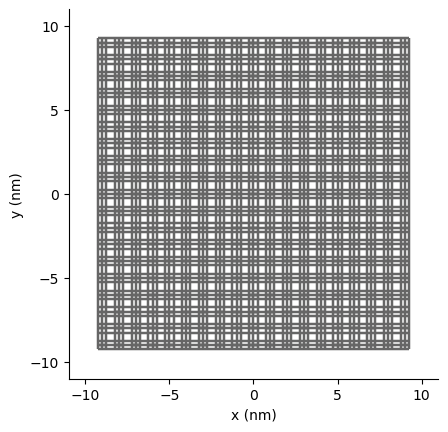

In [1067]:
model = pb.Model(
    lattice,
)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

(1073.0, 1083.0)

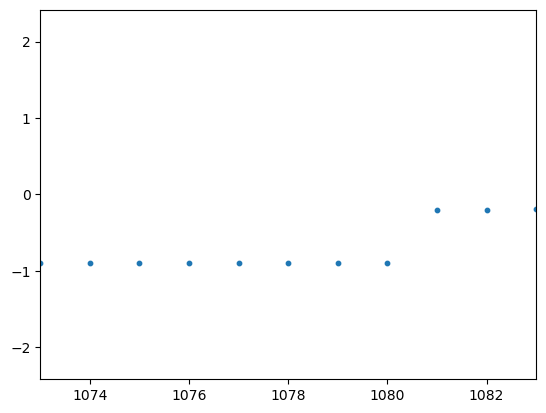

In [1068]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues
plt.scatter(range(1, np.size(bands)+1), bands, s=10)
#plt.ylim(-0.5, 0.5)
#plt.xlim(0, 600)
#plt.ylim(-1, 0)
plt.xlim(3*(2*cladding+1)**2-10, 3*(2*cladding+1)**2)
#plt.xlim(1310, 1330)

In [1069]:
3*(2*cladding+1)**2

1083

In [1070]:
prob = solver.calc_probability(range(0, 3*(2*cladding+1)**2-3))

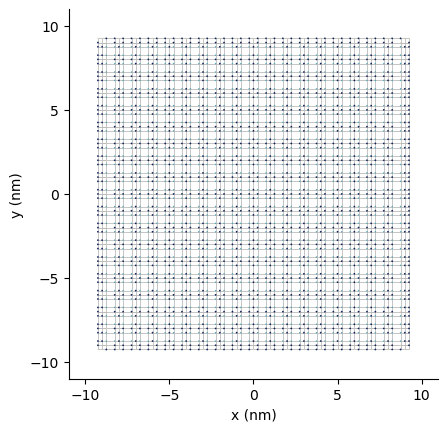

In [1071]:
prob.plot()

In [1072]:
np.sum(prob.data)

1080.0

In [1073]:
dat = np.array([])
for i in range(0, int(prob.num_sites/8)):
    dat = np.append(dat, sum(prob.data[i*8:8+8*i]) -3) 

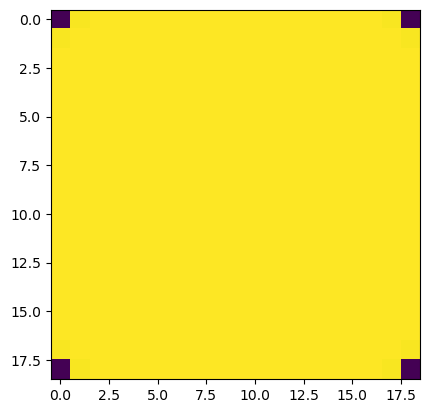

In [1074]:
plt.imshow(np.reshape(dat, (2*cladding+1, 2*cladding+1)))